# Project Overview

#### Objective:
Regression: Predict product sales (numeric).


Classification: Classify products into sales categories (e.g., High, Medium, Low sales).

## Dataset Description

dataset with:

Product_ID: Unique product identifier.

    
Category: Product category (e.g., Electronics, Furniture).


Price: Price of the product.

    
Discount: Discount percentage applied.


Customer_Rating: Average customer rating (1–5).


Sales: Total sales for the product.

    
Sales_Category: Derived from Sales (Low, Medium, High).

## Load all Relevant Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
# Save dataset for reference
#df.to_csv("RandomForest_sales_data.csv", index=False)

### Load Data Set

In [24]:
df = pd.read_csv("RandomForest_sales_data.csv")

In [26]:
df.head()

,Product_ID,Category,Price,Discount,Customer_Rating,Sales,Sales_Category
0,P_1,Clothing,39.37,44.41,4.3,31.64,Low
1,P_2,Electronics,678.67,17.21,2.8,705.77,Medium
2,P_3,Clothing,54.41,5.17,3.0,97.04,Low
3,P_4,Clothing,456.09,12.32,3.1,1109.89,Medium
4,P_5,Electronics,930.13,20.73,2.8,1109.58,Medium


# EDA

In [28]:
df.shape

(3456, 7)

In [30]:
df.isnull().sum()

Product_ID         0
Category           0
Price              0
Discount           0
Customer_Rating    0
Sales              0
Sales_Category     0
dtype: int64

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,3456.0,503.912983,284.891286,10.18,258.375,508.115,751.3800,999.72
Discount,3456.0,27.661690,13.006906,5.03,16.750,27.895,38.7925,49.99
Customer_Rating,3456.0,2.996817,1.152754,1.00,2.000,3.000,4.0000,5.00
Sales,3456.0,728.470041,500.147476,9.33,330.675,644.130,1035.5575,2555.15


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_ID       3456 non-null   object 
 1   Category         3456 non-null   object 
 2   Price            3456 non-null   float64
 3   Discount         3456 non-null   float64
 4   Customer_Rating  3456 non-null   float64
 5   Sales            3456 non-null   float64
 6   Sales_Category   3456 non-null   object 
dtypes: float64(4), object(3)
memory usage: 189.1+ KB


## Data Visualisation and Analysis

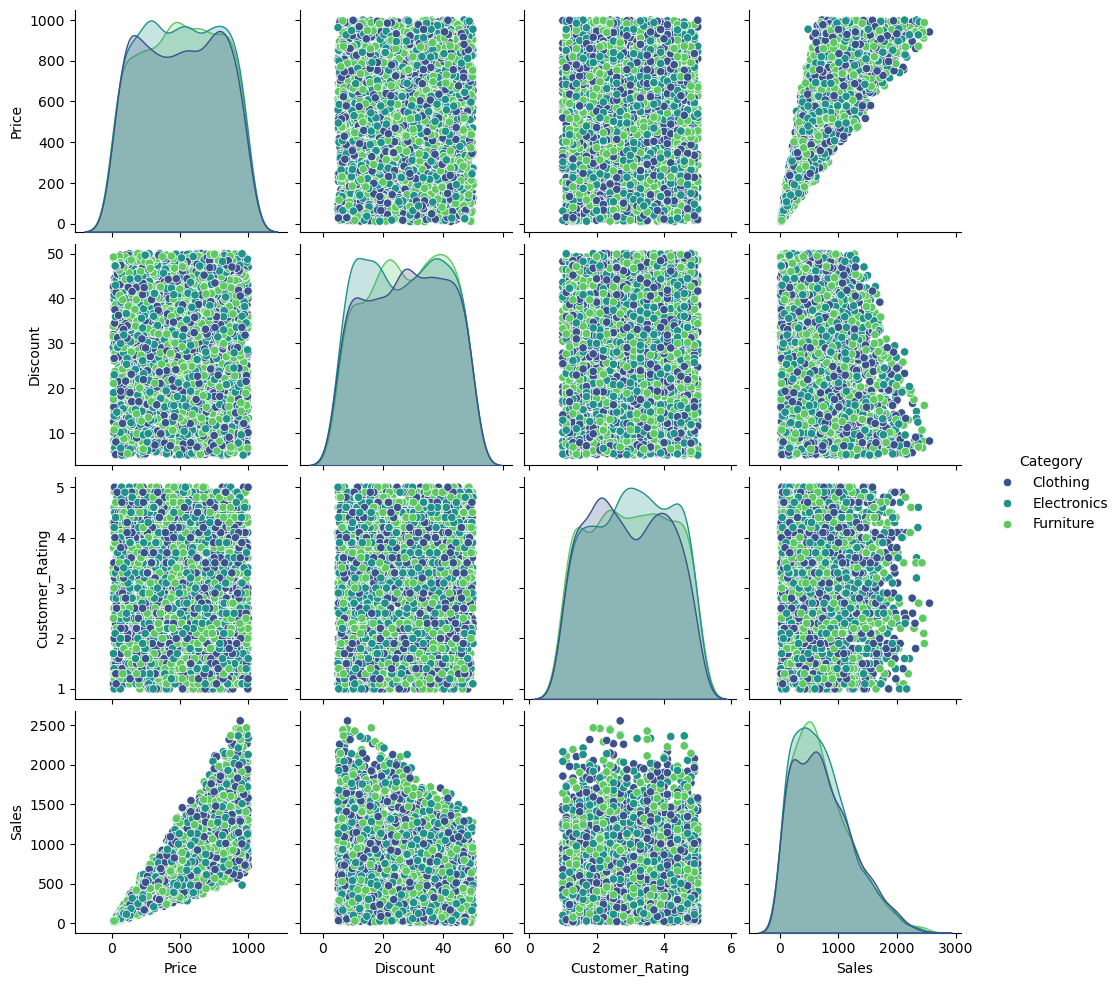

In [37]:
# Seaborn pairplot
sns.pairplot(df, hue="Category", diag_kind="kde", palette="viridis")
plt.show()

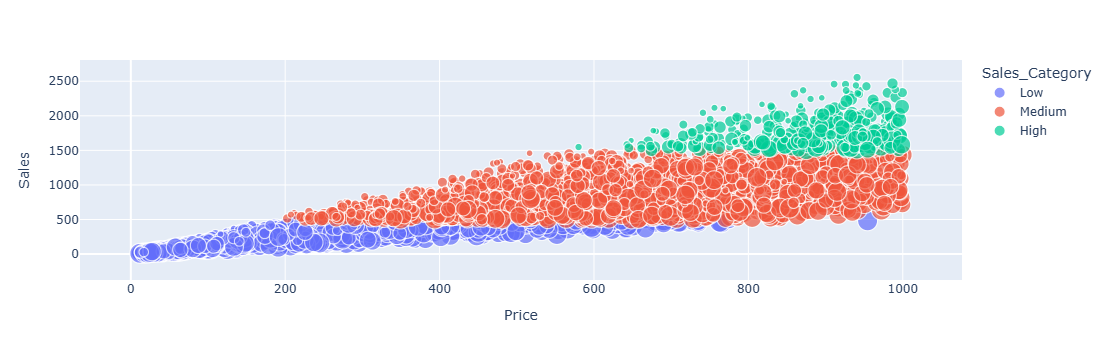

In [41]:
# Plotly: Interactive scatter plot
fig = px.scatter(
    df, 
    x="Price", 
    y="Sales", 
    color="Sales_Category", 
    size="Discount", 
    hover_data=["Product_ID", "Category"]
)
fig.show()

## Data Preprocessing

In [44]:
# Encode categorical features
label_encoder = LabelEncoder()
df["Category_Encoded"] = label_encoder.fit_transform(df["Category"])
df["Sales_Category_Encoded"] = label_encoder.fit_transform(df["Sales_Category"])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product_ID              3456 non-null   object 
 1   Category                3456 non-null   object 
 2   Price                   3456 non-null   float64
 3   Discount                3456 non-null   float64
 4   Customer_Rating         3456 non-null   float64
 5   Sales                   3456 non-null   float64
 6   Sales_Category          3456 non-null   object 
 7   Category_Encoded        3456 non-null   int32  
 8   Sales_Category_Encoded  3456 non-null   int32  
dtypes: float64(4), int32(2), object(3)
memory usage: 216.1+ KB


## TEST/TRAIN SPLIT FOR BOTH CLASSIFIER AND REGRESSOR MODEL

In [49]:
#features
X = df[["Category_Encoded", "Price", "Discount", "Customer_Rating"]]

In [51]:
#targets for regression
y_reg = df["Sales"]  # Regression target

In [53]:
#targets for classification
y_clf = df["Sales_Category_Encoded"]  # Classification target

In [55]:
# Train-test split for Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42) #Train/Split for Regression

In [57]:
#Train/Split for Classificationb
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42) #Train/Split for Classificationb

#  Random Forest Regressor Model

In [60]:
# Train Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [63]:
# Predict
y_pred_reg = regressor.predict(X_test_reg)

In [65]:
# Evaluate
print("Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R^2 Score: {r2_score(y_test_reg, y_pred_reg):.2f}")

Regression Metrics:
Mean Squared Error: 72947.53
R^2 Score: 0.72


## Feature Importances

C:\Users\User\AppData\Local\Temp\ipykernel_7632\561029669.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




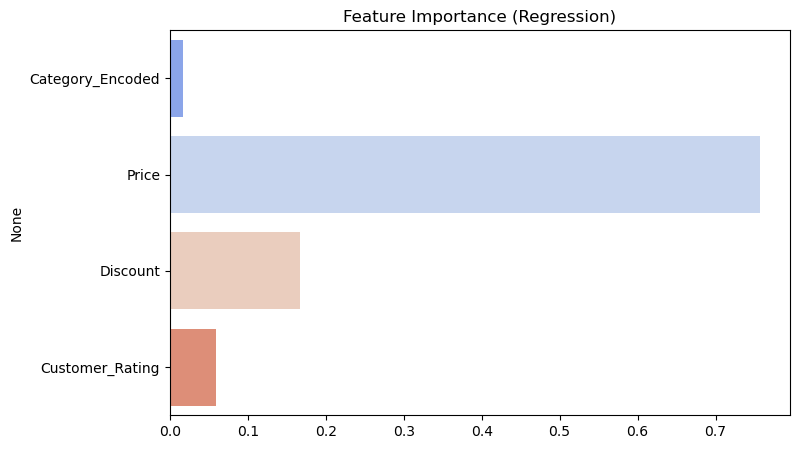

In [126]:
# Feature importance visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=regressor.feature_importances_, y=X.columns, palette="coolwarm")
plt.title("Feature Importance (Regression)")
plt.show()

## GridSearching for a better Model

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [82]:
# Perform Grid Search
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_reg, y_train_reg)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\User\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='r2', verbose=2)

In [85]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}


In [87]:
# Train the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_reg)

In [89]:
# Evaluate performance
print("MSE:", mean_squared_error(y_test_reg, y_pred))
print("R^2 Score:", r2_score(y_test_reg, y_pred))

MSE: 68251.20495104874
R^2 Score: 0.7399721063233113


## Best Perfoming Model

In [140]:
# Best performing model after grid search
best_rf = grid_search.best_estimator_

### Feature Importance Determination for the Best Model

In [143]:
# Get feature importances
feature_importances = best_rf.feature_importances_

In [145]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train_reg.columns,
    'Importance': feature_importances
})

In [147]:
feature_importance_df

,Feature,Importance
0,Category_Encoded,0.008786
1,Price,0.815104
2,Discount,0.144196
3,Customer_Rating,0.031915


In [149]:
# Sort the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [151]:
# Print feature importances
print(feature_importance_df)

            Feature  Importance
1             Price    0.815104
2          Discount    0.144196
3   Customer_Rating    0.031915
0  Category_Encoded    0.008786


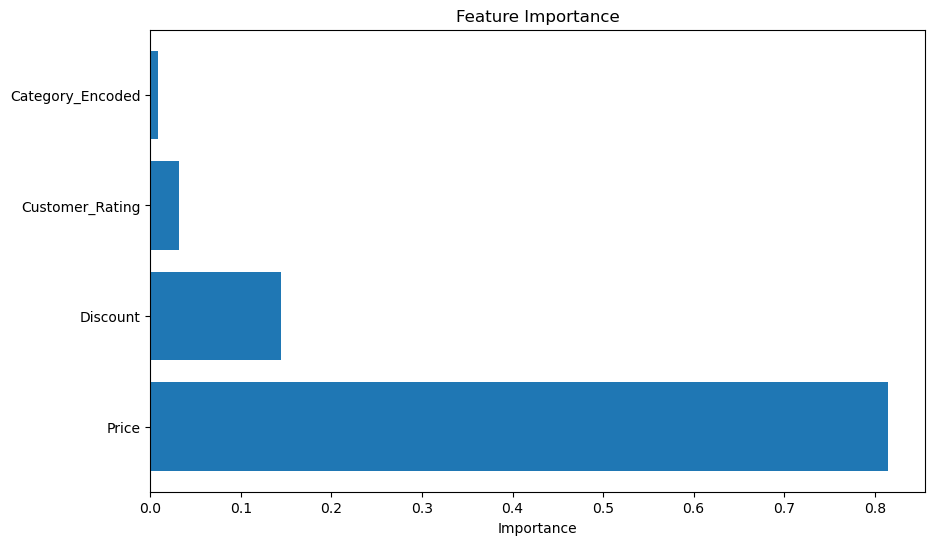

In [153]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

### Predict New Data Using the Fine-Tuned Model

In [156]:
# Example new data (replace this with your actual new data)
new_data = pd.DataFrame({
    "Category_Encoded": [1, 2],  # Example new category encoded values
    "Price": [100, 150],          # Example new prices
    "Discount": [10, 20],         # Example new discounts
    "Customer_Rating": [4.5, 3.9] # Example new customer ratings
})
new_data

,Category_Encoded,Price,Discount,Customer_Rating
0,1,100,10,4.5
1,2,150,20,3.9


In [158]:
# Predict on new data using the fine-tuned model
new_data_predictions = best_rf.predict(new_data)

In [160]:
new_data_predictions

array([168.90809203, 248.53146013])

In [162]:
# Output predictions
print("Predictions on new data:", new_data_predictions)

Predictions on new data: [168.90809203 248.53146013]


### Evaluate the Model Performance.

In [167]:
from sklearn.metrics import mean_squared_error, r2_score

In [169]:
# Evaluate model performance on test data
y_pred = best_rf.predict(X_test_reg)

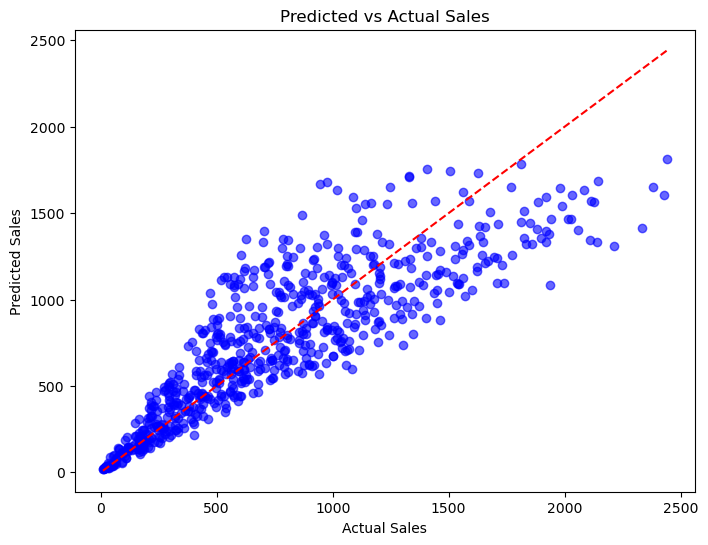

In [173]:
# Scatter plot: Predicted vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred, color='blue', alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

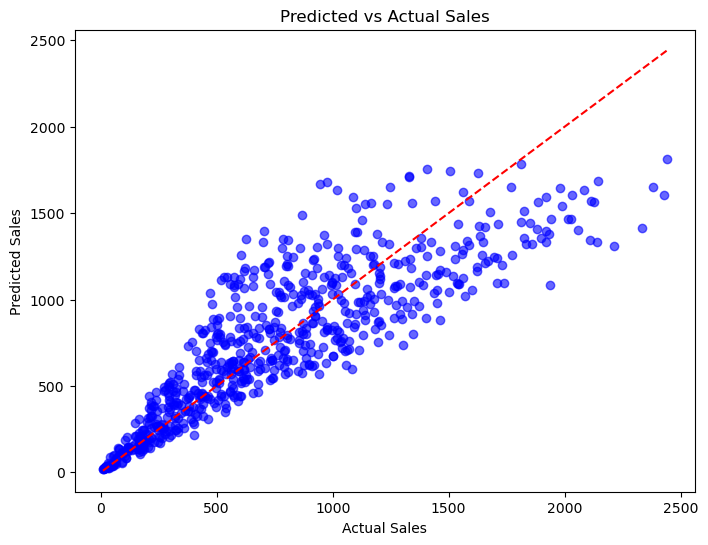

In [175]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = best_rf.predict(X_test_reg)

# Scatter plot: Predicted vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred, color='blue', alpha=0.6)

# Add a red dashed line where the predicted value equals the actual value
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', linestyle='--')

# Title and labels
plt.title('Predicted vs Actual Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Show plot
plt.show()


Visual Interpretation:


If the scatter plot points are close to the red dashed line, it means the model’s predictions are close to the actual values, indicating good performance.


    
If the points are spread far from the line, it suggests the model might not be performing well.

In [178]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate model performance on test data
y_pred = best_rf.predict(X_test_reg)

# Calculate performance metrics
mse = mean_squared_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

# Print the results
print("MSE on test data:", mse)
print("R² Score on test data:", r2)

MSE on test data: 68251.20495104874
R² Score on test data: 0.7399721063233113


# Save the Fine-Tuned Model.

If you are satisfied with the performance and feature importance, 

you can save the fine-tuned model for future use (e.g., prediction on new data).

In [182]:
import joblib

# Save the fine-tuned model
joblib.dump(best_rf, 'regressor2_model.pkl')

print("Fine-tuned model saved as 'regressor2_model.pkl'")

Fine-tuned model saved as 'regressor2_model.pkl'


## Baseline Model Example: To Asses the perfomance of the Model

In [92]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

In [95]:
# Create a Dummy Regressor that predicts the mean value
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_reg, y_train_reg)

DummyRegressor()

In [99]:
# Get baseline predictions
y_dummy_pred = dummy.predict(X_test_reg)

In [101]:
# Compute MSE
baseline_mse = mean_squared_error(y_test_reg, y_dummy_pred)

In [103]:
print("Baseline MSE:", baseline_mse)
print("Your Model MSE:", 68251.20)

Baseline MSE: 263295.89540728583
Your Model MSE: 68251.2


### If your model’s MSE is significantly lower than the baseline MSE, then it's performing well.

Key Observations:

✅ Baseline MSE (Dummy Regressor): 263,295.90

✅ Your Model MSE: 68,251.20

✅ Performance Improvement: Your model reduces the error by about 74% compared to the dummy regressor.

What This Means

Your model captures meaningful patterns in the data rather than just predicting the mean.


A lower MSE means that the predictions are much closer to the actual values than a naive model.


R² = 0.74, meaning 74% of the variance in the target variable is explained by your model, which is quite good.


###### ==============================END OF  FOREST REGRASSOR=======================================================

#                                                       --Random Forest Classifier---

In [128]:
# Train Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_clf, y_train_clf)

RandomForestClassifier(random_state=42)

In [130]:
# Predict
y_pred_clf = classifier.predict(X_test_clf)

In [132]:
# Evaluate
print("Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.2f}")
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))

Classification Metrics:
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        70
           1       0.89      0.84      0.86       253
           2       0.78      0.88      0.82       369

    accuracy                           0.80       692
   macro avg       0.72      0.66      0.68       692
weighted avg       0.79      0.80      0.79       692



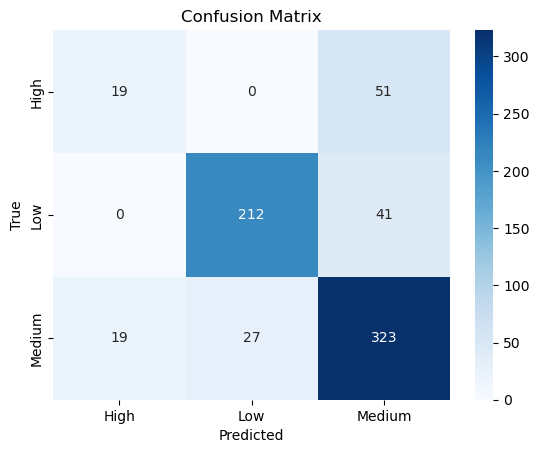

In [134]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 6. Visualize Trees

In [137]:
# Visualize one tree
tree = regressor.estimators_[0]  # Access a single tree
dot_data = export_graphviz(tree, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # Save as file
graph.view()  # View in the default

'random_forest_tree.pdf'